# Summary
Variance across 1 session over t for the movement curve

### imports:

In [1]:
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
import statistics
import pandas as pd

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lombscargle.html
import scipy.signal as signal

# interpolation because ARDUINO data is spaced unevenly
import scipy.interpolate as interpolate


import pickle # save data
import glob # find files in a directory
import re # regex for string parsing

### set `folder_name`

In [3]:
# for all .mat files in this folder starting with "ToneDisc_ANChandler_p1_" in their name
folder_name = './Joey/Phase1/ToneDisc_ANJoey_p1_'

### sort through relevant .mat files found in folder by day ("_d#")

In [5]:
unsorted_mat_files = glob.glob(folder_name+'*.mat')
sorted_mat_files = sorted(unsorted_mat_files, key=lambda x: int(re.search(r'\d+.mat$',x).group()[:-4]))
sorted_mat_files

['./Joey/Phase1/ToneDisc_ANJoey_p1_d1.mat',
 './Joey/Phase1/ToneDisc_ANJoey_p1_d2.mat',
 './Joey/Phase1/ToneDisc_ANJoey_p1_d3.mat',
 './Joey/Phase1/ToneDisc_ANJoey_p1_d4.mat',
 './Joey/Phase1/ToneDisc_ANJoey_p1_d5.mat',
 './Joey/Phase1/ToneDisc_ANJoey_p1_d6.mat',
 './Joey/Phase1/ToneDisc_ANJoey_p1_d7.mat',
 './Joey/Phase1/ToneDisc_ANJoey_p1_d8.mat',
 './Joey/Phase1/ToneDisc_ANJoey_p1_d9.mat',
 './Joey/Phase1/ToneDisc_ANJoey_p1_d10.mat',
 './Joey/Phase1/ToneDisc_ANJoey_p1_d11.mat',
 './Joey/Phase1/ToneDisc_ANJoey_p1_d12.mat',
 './Joey/Phase1/ToneDisc_ANJoey_p1_d13.mat',
 './Joey/Phase1/ToneDisc_ANJoey_p1_d14.mat']

### loop through session datas, get `respMTX` and `dataArduino` for that session

In [88]:
num_sessions = len(sorted_mat_files)
# initialize empty output array
rxn_ts_means_vars = pd.DataFrame(columns=['mat_file_name', 'rxn_ts_mean', 'rxn_ts_var'])

# loop through all .mat files found in folder as sessions
for mat_file_string_i, mat_file_string in enumerate(sorted_mat_files): 
    # load `data` from .mat file and split into `params` and `response`
    mat_dict = io.loadmat(mat_file_string)

    data = mat_dict['data'][0][0]
    params = data[0][0][0]
    response = data[1][0][0]

    # get `respMTX` (trials) from response
    respMTX = response[2]
    #print("respMTX shape: "+str(respMTX.shape))

    num_trials = respMTX.shape[0]
    #print("number of trials: "+str(num_trials))

    # Loop through each trial
    # ignore NaN values from trials where mouse pressed lever during foreperiod
    rxn_ts = []
    for trial_i in range(0, num_trials):
        trial_respMTX = respMTX[trial_i]

        tone_t = trial_respMTX[1]
        lever_press_t = trial_respMTX[3]
        rxn_ts.append(lever_press_t - tone_t)

    rxn_ts_var = np.nanvar(rxn_ts)
    rxn_ts_mean = np.nanmean(rxn_ts)
    #print("mean: "+str(rxn_ts_mean))
    #print("var: "+str(rxn_ts_var))

    # add these to the final output array
    rxn_ts_means_vars.at[mat_file_string_i, 'mat_file_name'] = (mat_file_string)
    rxn_ts_means_vars.at[mat_file_string_i, 'rxn_ts_mean'] = rxn_ts_mean
    rxn_ts_means_vars.at[mat_file_string_i, 'rxn_ts_var'] = rxn_ts_var

In [89]:
rxn_ts_means_vars

,mat_file_name,rxn_ts_mean,rxn_ts_var
0,./Joey/Phase1/ToneDisc_ANJoey_p1_d1.mat,3.15144,25.527129
1,./Joey/Phase1/ToneDisc_ANJoey_p1_d2.mat,1.756806,10.557164
2,./Joey/Phase1/ToneDisc_ANJoey_p1_d3.mat,3.576621,17.272972
3,./Joey/Phase1/ToneDisc_ANJoey_p1_d4.mat,4.974976,23.23232
4,./Joey/Phase1/ToneDisc_ANJoey_p1_d5.mat,2.746407,8.941344
5,./Joey/Phase1/ToneDisc_ANJoey_p1_d6.mat,2.265008,9.654593
6,./Joey/Phase1/ToneDisc_ANJoey_p1_d7.mat,1.505154,8.743669
7,./Joey/Phase1/ToneDisc_ANJoey_p1_d8.mat,2.247384,9.579995
8,./Joey/Phase1/ToneDisc_ANJoey_p1_d9.mat,1.352618,7.91955
9,./Joey/Phase1/ToneDisc_ANJoey_p1_d10.mat,1.343629,6.51138


### Save `output` into a pickle file
`output`: 3 columns

String, mat_file_name | num, mean | num, var

In [90]:
with open(mat_file_string+'_rxn_ts_means_vars.pickle', 'wb') as handle:
    pickle.dump(rxn_ts_means_vars, handle, protocol=pickle.HIGHEST_PROTOCOL)

### plot rxn_t means and vars over training days

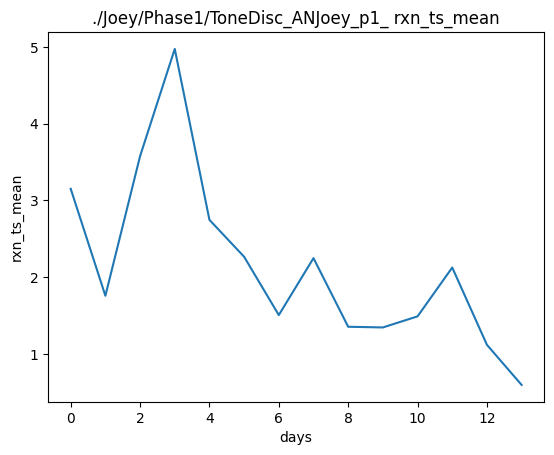

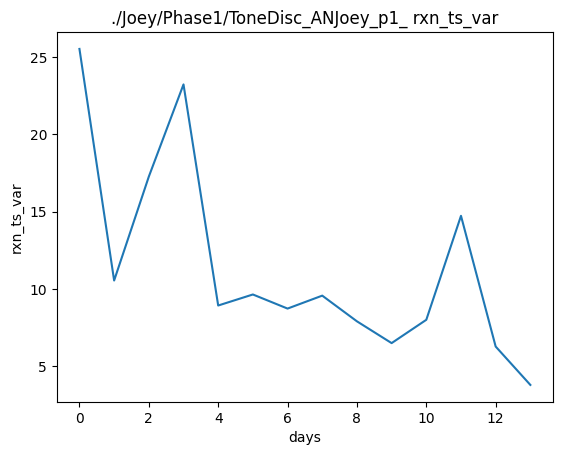

In [91]:
plt.plot(range(0, len(sorted_mat_files)), rxn_ts_means_vars['rxn_ts_mean'])
plt.title(folder_name + " rxn_ts_mean")
plt.xlabel("days")
plt.ylabel("rxn_ts_mean")
plt.savefig(folder_name + "_rxn_ts_mean" + ".png")
plt.show()

plt.plot(range(0, len(sorted_mat_files)), rxn_ts_means_vars['rxn_ts_var'])
plt.title(folder_name + " rxn_ts_var")
plt.xlabel("days")
plt.ylabel("rxn_ts_var")
plt.savefig(folder_name + "_rxn_ts_var" +".png")
plt.show()